In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os

In [2]:
plot_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Plots/"
data_output_dir = "/Users/vibhav/Documents/Projects/nimf-tracker-git/nimf-tracker/Output Data/"

In [8]:
local_path = os.getcwd()+"/"

In [10]:
bl_path = "/Users/vibhav/Downloads/Bloomberg 10 Year Govt Bond TR Index (4).xlsx"


In [11]:
def concatter(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[:last_date_in_local][:-1], local_df])
    return final_df

In [12]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])
    return final_df

# 3ybbb

In [13]:
bbb = concatter2(file_name = "3bbb_yield.csv", col1=9, col2=10, rename_from="PX_LAST.3", rename_to="3BBB")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/1243695850.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


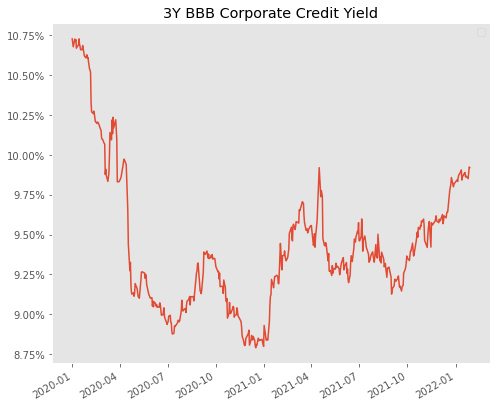

In [15]:
ax = bbb.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('3Y BBB Corporate Credit Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'3ybbb.png', dpi=150, bbox_inches='tight')

In [16]:
bbb.to_csv(data_output_dir+"3bbb_yield.csv")
bbb.to_csv("3bbb_yield.csv")

In [17]:
bbb.round(2)

,3BBB
Date,
2022-01-28,9.92
2022-01-27,9.92
2022-01-25,9.85
2022-01-21,9.87
2022-01-20,9.86
...,...
2020-01-07,10.71
2020-01-06,10.72
2020-01-03,10.68


# call

In [18]:
call = concatter2(file_name = "call_rate.csv", col1=3, col2=4, rename_from="PX_LAST.1", rename_to="call rate")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


In [19]:
call.round(2)

,call rate
Date,
2022-01-28,3.60
2022-01-27,3.68
2022-01-25,3.66
2022-01-21,4.00
2022-01-20,3.99
...,...
2019-01-07,6.36
2019-01-04,6.35
2019-01-03,6.34


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/173562577.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


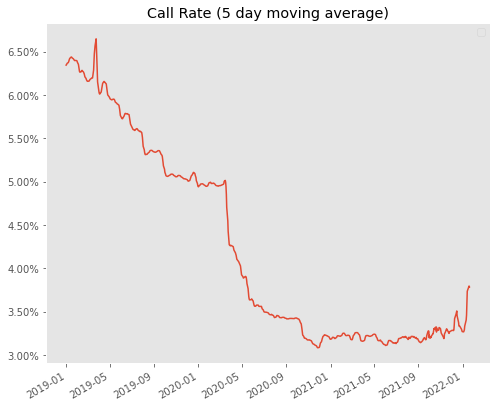

In [20]:
ax = call.rolling(5).mean().plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Call Rate (5 day moving average)')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'call.png', dpi=300, bbox_inches='tight')

In [21]:
call.to_csv(data_output_dir+"call_rate.csv")
call.to_csv("call_rate.csv")

In [22]:
call[::-1].rolling(5).mean().round(2)

,call rate
Date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,6.34
...,...
2022-01-20,3.59
2022-01-21,3.74
2022-01-25,3.78


# gsec

In [24]:
ten_yr = concatter2(file_name = "gsec_tenyr.csv", col1=6, col2=7, rename_from="PX_LAST.2", rename_to="10Y")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


In [25]:
ten_yr.round(2)

,10Y
Date,
2022-01-28,6.75
2022-01-27,6.75
2022-01-25,6.66
2022-01-21,6.63
2022-01-20,6.61
...,...
2020-01-07,6.55
2020-01-06,6.57
2020-01-03,6.52


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/2214621167.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


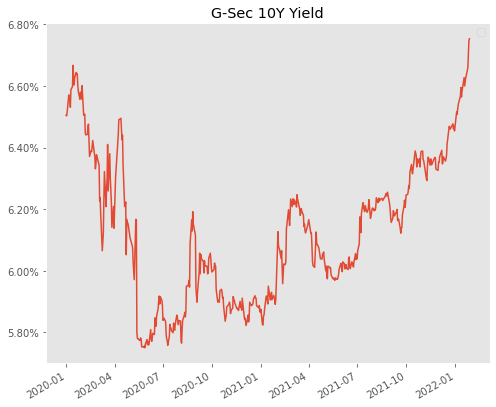

In [27]:
ax=ten_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('G-Sec 10Y Yield')
plt.grid(b=False)
plt.tight_layout()
plt.legend("")
plt.xlabel("")
plt.savefig(plot_output_dir+'10ygsec.png', dpi=300, bbox_inches='tight')


In [22]:
ten_yr

,10Y
Date,
2022-01-21,6.626
2022-01-20,6.614
2022-01-19,6.600
2022-01-18,6.627
2022-01-14,6.582
...,...
2020-01-07,6.554
2020-01-06,6.571
2020-01-03,6.515


In [28]:
ten_yr.to_csv(data_output_dir+"gsec_tenyr.csv")
ten_yr.to_csv("gsec_tenyr.csv")

# 1 yr t bill - somehow there is a parsing issue, do this manually

In [29]:
# new = pd.read_csv("/Users/vibhav/Desktop/tbill_oneyr 2.csv", index_col=0, parse_dates=True, dayfirst=True)

In [30]:
# new

In [31]:
# new.plot()

In [32]:
# new

In [33]:
one_yr = concatter2(file_name = "tbill_oneyr.csv", col1=18, col2=19, rename_from="PX_LAST.6", rename_to="12M")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


In [34]:
# one_yr = pd.read_excel("/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Untitled Folder/2020-06-24/New/Copy/tbill_oneyr.xlsx", index_col=0, parse_dates=True)

In [35]:
# one_yr.index = pd.to_datetime(one_yr.index, format="%Y-%m-%d", dayfirst=True)

In [36]:
# one_yr = new

In [37]:
one_yr

,12M
Date,
2022-01-28,4.50
2022-01-27,4.49
2022-01-25,4.50
2022-01-21,4.47
2022-01-20,4.41
...,...
2020-01-07,5.23
2020-01-06,5.20
2020-01-03,5.24


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3507872433.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


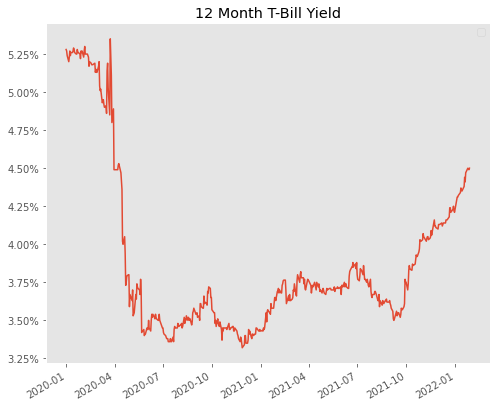

In [38]:
ax = one_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('12 Month T-Bill Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'12m_tbill.png', dpi=300, bbox_inches='tight')

In [39]:

one_yr.to_csv(data_output_dir+"tbill_oneyr.csv")
one_yr.to_csv("tbill_oneyr.csv")


# vix

In [40]:
vix = concatter2(file_name="vix.csv", col1=21, col2=22, rename_from="PX_LAST.7", rename_to="VIX")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/2998545489.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


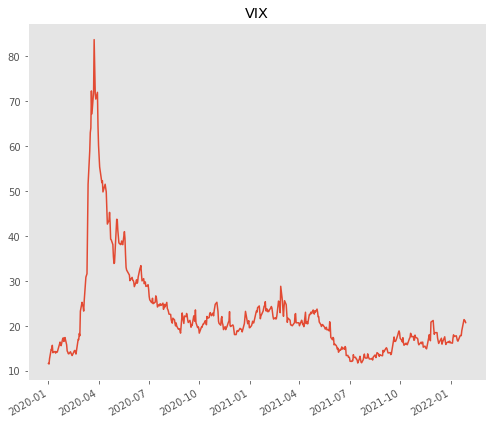

In [42]:
vix['VIX'].plot(figsize=(7,6))
plt.title('VIX')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")


plt.savefig(plot_output_dir+"vix.png", dpi=150, bbox_inches='tight')



In [43]:
vix.round(2)

,VIX
2022-01-28,20.70
2022-01-27,21.06
2022-01-25,21.36
2022-01-21,18.89
2022-01-20,17.79
...,...
2020-01-07,14.61
2020-01-06,14.78
2020-01-03,12.70
2020-01-02,11.49


In [44]:
vix.to_csv(data_output_dir+"vix.csv")
vix.to_csv("vix.csv")

# wti

In [45]:
wti = concatter2(file_name="wti.csv", col1=15, col2=16, rename_from="PX_LAST.5", rename_to="WTI")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/1189691665.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


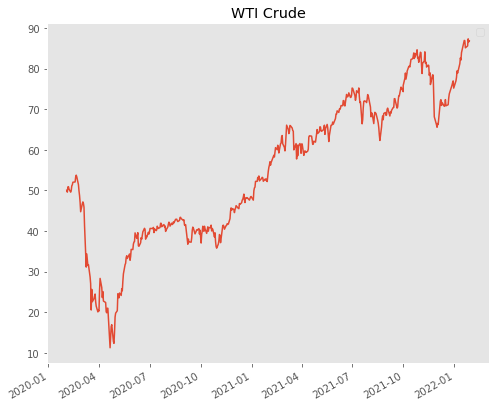

In [46]:
wti.plot(figsize=(7,6))
plt.title('WTI Crude')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'WTI.png', dpi=150, bbox_inches='tight')

In [47]:
wti.to_csv(data_output_dir+"wti.csv")
wti.to_csv("wti.csv")


In [48]:
wti

,WTI
Date,
2022-01-28,86.82
2022-01-27,86.61
2022-01-26,87.35
2022-01-25,85.60
2022-01-21,85.14
...,...
2020-02-07,50.34
2020-02-06,50.94
2020-02-05,50.87


# usd inr

In [49]:
# import yfinance as yf

In [50]:
# nifty_comm = yf.download("^CNXCMDT", start='2020-01-01', end=dt.datetime.today())

In [51]:
# nifty_comm

In [52]:
usd_inr = concatter2(file_name="usdinr.csv", col1=12, col2=13, rename_from="PX_LAST.4", rename_to="USD INR")

/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/3903374587.py:11: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])


In [53]:
usd_inr.round(2)

,USD INR
Date,
2022-01-28,75.04
2022-01-27,75.07
2022-01-25,74.78
2022-01-21,74.43
2022-01-20,74.51
...,...
2021-12-27,75.00
2021-12-28,74.66
2021-12-29,74.74


/var/folders/l0/9zb8_rjd2tsghrl0qqtyv4mw0000gn/T/ipykernel_6338/1787994921.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


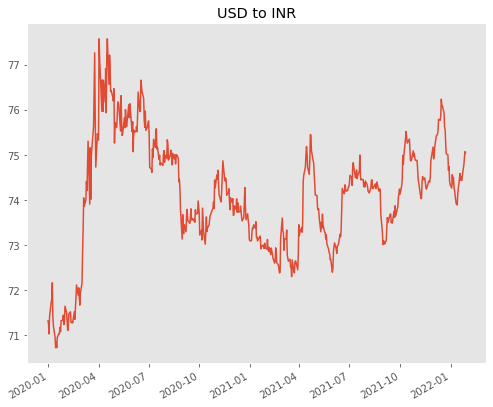

In [54]:
usd_inr['USD INR'].plot(figsize=(7,6), x_compat=True)
plt.title('USD to INR')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'usdinr.png', dpi=150, bbox_inches='tight')

In [55]:
usd_inr.to_csv("usdinr.csv")
usd_inr.to_csv(data_output_dir+"usdinr.csv")
